In [1]:
import os
os.chdir("..")

In [2]:
import re
import json
import numpy as np
import pandas as pd
import yaml
import time
import glob

import matplotlib.pyplot as plt


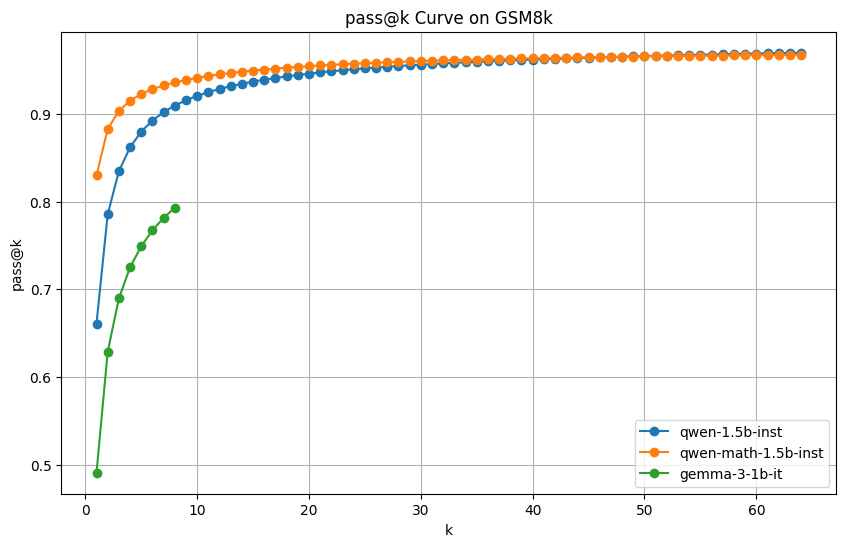

In [7]:
all_metrics = {}

with open("runs/default/gsm8k.qwen-1.5b-inst/direct/sample_2/metrics.11.22,21:34.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst'] = json.load(f)['overall']

with open("runs/default/gsm8k.qwen-math-1.5b-inst/direct/sample_1/metrics.11.22,21:46.json", encoding='utf-8') as f:
    all_metrics['qwen-math-1.5b-inst'] = json.load(f)['overall']

with open("runs/default/gsm8k.gemma-3-1b-it/direct/sample_1/metrics.11.23,19:32.json", encoding='utf-8') as f:
    all_metrics['gemma-3-1b-it'] = json.load(f)['overall']

# with open("runs/default/gsm8k.qwen-1.5b-inst/distilled-100.direct/sample_1/metrics.11.23,14:27.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-100'] = json.load(f)['overall']

# with open("runs/default/gsm8k.qwen-1.5b-inst/distilled-150.direct/sample_1/metrics.11.23,14:22.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, marker='o', label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on GSM8k')
plt.grid(True)
plt.legend()
plt.show()

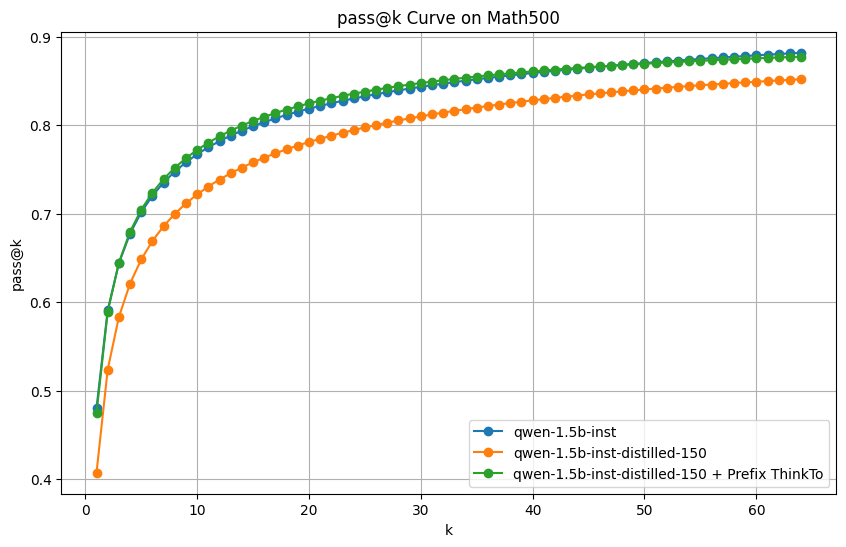

In [5]:
all_metrics = {}
with open("runs/default/math500.qwen-1.5b-inst/direct/sample_1/metrics.11.23,3:39.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst'] = json.load(f)['overall']

with open("runs/default/math500.qwen-1.5b-inst/distilled-150.direct/sample_1/metrics.11.23,3:40.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst-distilled-150'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.direct/sample_2/metrics.11.23,14:56.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 (max-token=10000)'] = json.load(f)['overall']

# with open("runs/default/math500.qwen-1.5b-inst/distilled-150.prefix/To/metrics.11.23,4:7.json", encoding='utf-8') as f:
#     all_metrics['qwen-1.5b-inst-distilled-150 + Prefix To'] = json.load(f)['overall']

with open("runs/default/math500.qwen-1.5b-inst/distilled-150.prefix/ThinkTo/metrics.11.23,15:19.json", encoding='utf-8') as f:
    all_metrics['qwen-1.5b-inst-distilled-150 + Prefix ThinkTo'] = json.load(f)['overall']

plt.figure(figsize=(10,6))

for model_name, metrics in all_metrics.items():
    pass_at_k = metrics['pass_at_k']
    ks = [int(k.split('@')[1]) for k in pass_at_k.keys()]
    values = [pass_at_k[f'pass@{k}'] for k in ks]
    plt.plot(ks, values, marker='o', label=model_name)

plt.xlabel('k')
plt.ylabel('pass@k')
plt.title('pass@k Curve on Math500')
plt.grid(True)
plt.legend()
plt.show()
